In [1]:
# Part 2: Clustering  
# 2B: K-Means. 

In [2]:
import os 
# for data analysis
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt

# for preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# for clustering
from sklearn.cluster import KMeans

# for splitting the data
from sklearn.model_selection import train_test_split

# for evaluation
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

In [3]:
#Added to avoid memory leak warnings
os.environ["OMP_NUM_THREADS"] = '1'

In [4]:
#1 and #2 Get the dataset and load the dataset

In [5]:
data_m_c = pd.read_csv('Mall_Customers.csv')
data_m_c.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#3 Describe the data
print("DATASET (Mall Customers) DESCRIPTION")
print(data_m_c.describe().transpose()) 

DATASET (Mall Customers) DESCRIPTION
                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  


In [7]:
print("DATASET (Mall Customers) INFORMATION")
print(data_m_c.info())

DATASET (Mall Customers) INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [8]:
#4 Preprocess and split the data into train and test sets. 

#Removing the customer ID
data_m_c.drop(columns=["CustomerID"], inplace=True)
data_m_c.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


In [9]:
#Convert gender into numerical

l_e=LabelEncoder()
data_m_c["Gender"] = l_e.fit_transform(data_m_c["Gender"])
data_m_c.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [10]:
# Normalize Dataset
m_m_s=MinMaxScaler()
normalize_data_m_c=pd.DataFrame(m_m_s.fit_transform(data_m_c), columns=data_m_c.columns)
normalize_data_m_c.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469
199,1.0,0.230769,1.000000,0.836735


In [11]:
#Split the dataset
features_train_m_c, features_test_m_c= train_test_split(normalize_data_m_c, test_size=0.2, random_state=42)
print(features_train_m_c.describe().transpose())
print("-."*40)
print(features_test_m_c.describe().transpose())

                        count      mean       std  min       25%       50%  \
Gender                  160.0  0.431250  0.496806  0.0  0.000000  0.000000   
Age                     160.0  0.402163  0.266473  0.0  0.211538  0.346154   
Annual Income (k$)      160.0  0.373822  0.224550  0.0  0.202869  0.385246   
Spending Score (1-100)  160.0  0.518112  0.269598  0.0  0.354592  0.505102   

                             75%  max  
Gender                  1.000000  1.0  
Age                     0.596154  1.0  
Annual Income (k$)      0.516393  1.0  
Spending Score (1-100)  0.744898  1.0  
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
                        count      mean       std       min       25%  \
Gender                   40.0  0.475000  0.505736  0.000000  0.000000   
Age                      40.0  0.396154  0.280539  0.000000  0.149038   
Annual Income (k$)       40.0  0.371926  0.175836  0.032787  0.270492   
Spending Score (1-100)   40.0  0.437

[70.10782278872972, 30.807128964660045, 27.31137225745141, 19.013975837036234, 16.75824129505487, 15.045029046190361, 11.768472757595264, 10.430265405241446, 9.258305242697478, 8.41373213543643, 7.341216915481817, 6.687151574961414, 5.7383294373462315, 5.875322521659389, 5.406081794353067, 4.841565503925364, 4.982251002171823, 4.164647538456431, 4.162229443749815, 4.157976264687981, 4.080033721004001, 3.2830449119246072]


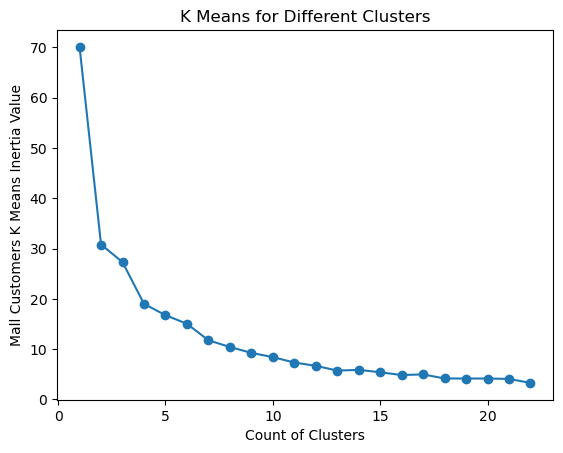

In [12]:
#5 Initialize K-Means. 

#Plotting Graph
import warnings
warnings.filterwarnings('ignore')
 
km_m_c=[]
for i in range(1,23):
    kmeans_m_c=KMeans(n_clusters=i)
    kmeans_m_c.fit(features_train_m_c)
    km_m_c.append(kmeans_m_c.inertia_)

print(km_m_c)
plt.figure()
plt.plot(range(1,23),km_m_c,marker="o")
plt.xlabel("Count of Clusters")
plt.ylabel("Mall Customers K Means Inertia Value")
plt.title("K Means for Different Clusters")
plt.show()

In [13]:
#5 Initialize K-Means

kmeans_m_c=KMeans(n_clusters=4)

In [14]:
#6 Fit K-Means to the training data. 
kmeans_m_c.fit(features_train_m_c)

KMeans(n_clusters=4)

In [15]:
#7 Transform the data?

#8 Make predictions
train_prediction_m_c=kmeans_m_c.predict(features_train_m_c)
print(train_prediction_m_c)

test_prediction_m_c=kmeans_m_c.predict(features_test_m_c)
print(test_prediction_m_c)

[2 1 2 2 2 3 0 0 3 2 0 1 0 1 2 2 2 1 1 2 1 0 0 2 0 2 1 3 2 2 1 1 1 1 2 1 2
 3 0 0 0 1 2 1 3 1 3 2 2 1 2 1 2 1 0 2 3 2 1 1 0 1 0 1 1 1 1 2 2 1 1 1 1 3
 1 1 1 2 3 2 2 1 3 1 1 1 2 3 1 0 2 0 0 2 0 1 0 0 1 3 2 1 1 0 1 2 0 1 1 2 1
 3 2 1 0 1 1 1 1 2 3 1 3 3 2 2 1 2 2 0 0 0 1 1 2 1 1 0 3 3 1 0 1 1 1 1 1 2
 0 1 2 1 1 2 2 2 1 1 1 1]
[1 1 1 1 1 0 0 1 2 0 2 1 3 0 2 1 2 2 1 1 0 0 2 2 1 1 0 2 3 0 0 1 1 1 1 1 3
 1 1 2]


In [16]:
#9 Evaluate the model and provide the accuracy score. 

s_score=silhouette_score(features_test_m_c,test_prediction_m_c)
print("Silhouette Score (Test): "+str(s_score))

s_score=silhouette_score(features_train_m_c,train_prediction_m_c)
print("Silhouette Score (Train): "+str(s_score))

Silhouette Score (Test): 0.3944871971769911
Silhouette Score (Train): 0.3970121010611443


In [17]:
db_score=davies_bouldin_score(features_test_m_c,test_prediction_m_c)
print("Davies Bouldin Score (Test): "+str(db_score))

db_score=davies_bouldin_score(features_train_m_c,train_prediction_m_c)
print("Davies Bouldin Score (Train): "+str(db_score))

Davies Bouldin Score (Test): 0.8680786515220753
Davies Bouldin Score (Train): 0.9126086035223497


In [18]:
ch_score=calinski_harabasz_score(features_test_m_c,test_prediction_m_c)
print("Calinski Harabasz Score (Test): "+str(ch_score))

ch_score=calinski_harabasz_score(features_train_m_c,train_prediction_m_c)
print("Calinski Harabasz Score (Train): "+str(ch_score))

Calinski Harabasz Score (Test): 29.49680056944104
Calinski Harabasz Score (Train): 111.1382995105425


79     0.0
197    1.0
38     0.0
24     0.0
122    0.0
      ... 
106    0.0
14     1.0
92     1.0
179    1.0
102    1.0
Name: Gender, Length: 160, dtype: float64


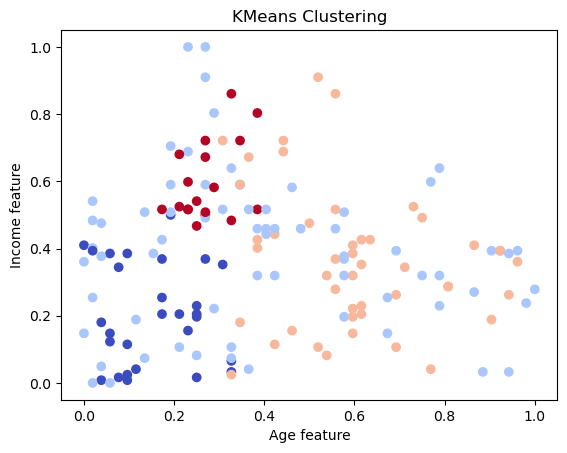

In [19]:
#Graph for Visualizing Clusters
#centers=kmeans.clusters_centers_
print(features_train_m_c.iloc[:, 0])
plt.xlabel("Age feature")
plt.ylabel("Income feature")
plt.scatter(features_train_m_c.iloc[:, 1],features_train_m_c.iloc[:, 2], c=train_prediction_m_c,cmap="coolwarm")
plt.title("KMeans Clustering")
plt.show()